# Data Analysis for final score predictor
This notebook focuses on analyzing the data for the final score predictor, so that I am able to discern the features that are predictive of the final score.

## Packages
First, I will import the relevant packages.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import data
The data is stored in the match_data.csv file stored in the Resources folder

In [130]:
# Load data
match_data = pd.read_csv(r"../Resources/match_data.csv")
match_data.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_3288\2703755179.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv(r"../Resources/match_data.csv")


Unnamed: 0 Unnamed: 1  Unnamed: 2  Unnamed: 3            batter  \
0     1381452    Austria           0           0  M Simpson-Parker   
1     1381452    Austria           0           1  M Simpson-Parker   
2     1381452    Austria           0           2  M Simpson-Parker   
3     1381452    Austria           0           3  M Simpson-Parker   
4     1381452    Austria           0           4  M Simpson-Parker   

          bowler    non_striker  batter runs  extra runs  total runs  score  \
0  Ghulam Ahmadi  Iqbal Hossain            0           0           0      0   
1  Ghulam Ahmadi  Iqbal Hossain            4           0           4      4   
2  Ghulam Ahmadi  Iqbal Hossain            0           0           0      4   
3  Ghulam Ahmadi  Iqbal Hossain            0           0           0      4   
4  Ghulam Ahmadi  Iqbal Hossain            1           0           1      5   

  extras wickets  out  Total Wickets non_boundary review replacements  
0    NaN     NaN    0              0          NaN    NaN          NaN  
1    NaN     NaN    0              0          NaN    NaN          NaN  
2    NaN     NaN    0              0          NaN    NaN          NaN  
3    NaN     NaN    0              0          NaN    NaN          NaN  
4    NaN     NaN    0              0          NaN    NaN          NaN

In [131]:
# Rename the columns
match_data.rename(columns = {"Unnamed: 0" : "match code", "Unnamed: 1": "country", "Unnamed: 2": "over", "Unnamed: 3": "ball"}, inplace = True)
match_data.head()

match code  country  over  ball            batter         bowler  \
0     1381452  Austria     0     0  M Simpson-Parker  Ghulam Ahmadi   
1     1381452  Austria     0     1  M Simpson-Parker  Ghulam Ahmadi   
2     1381452  Austria     0     2  M Simpson-Parker  Ghulam Ahmadi   
3     1381452  Austria     0     3  M Simpson-Parker  Ghulam Ahmadi   
4     1381452  Austria     0     4  M Simpson-Parker  Ghulam Ahmadi   

     non_striker  batter runs  extra runs  total runs  score extras wickets  \
0  Iqbal Hossain            0           0           0      0    NaN     NaN   
1  Iqbal Hossain            4           0           4      4    NaN     NaN   
2  Iqbal Hossain            0           0           0      4    NaN     NaN   
3  Iqbal Hossain            0           0           0      4    NaN     NaN   
4  Iqbal Hossain            1           0           1      5    NaN     NaN   

   out  Total Wickets non_boundary review replacements  
0    0              0          NaN    NaN          NaN  
1    0              0          NaN    NaN          NaN  
2    0              0          NaN    NaN          NaN  
3    0              0          NaN    NaN          NaN  
4    0              0          NaN    NaN          NaN

## Labelling the data
Now that we have the data, let's label it with the final scores.

In [132]:
# Create a new column for final score, we want to predict this

final_scores = match_data.groupby(["match code", "country"]).last().reset_index()
match_data = match_data.merge(final_scores[["match code", "country", "score"]],
                                 on = ["match code", "country"], suffixes = ('', " final"))
match_data.rename(columns={'score final': 'final score'}, inplace=True)
match_data


match code      country  over  ball            batter         bowler  \
0          1381452      Austria     0     0  M Simpson-Parker  Ghulam Ahmadi   
1          1381452      Austria     0     1  M Simpson-Parker  Ghulam Ahmadi   
2          1381452      Austria     0     2  M Simpson-Parker  Ghulam Ahmadi   
3          1381452      Austria     0     3  M Simpson-Parker  Ghulam Ahmadi   
4          1381452      Austria     0     4  M Simpson-Parker  Ghulam Ahmadi   
...            ...          ...   ...   ...               ...            ...   
407784      211048  New Zealand    19     1         JW Wilson     GD McGrath   
407785      211048  New Zealand    19     2         JW Wilson     GD McGrath   
407786      211048  New Zealand    19     3         DR Tuffey     GD McGrath   
407787      211048  New Zealand    19     4         DR Tuffey     GD McGrath   
407788      211048  New Zealand    19     5          KD Mills     GD McGrath   

          non_striker  batter runs  extra runs  total runs  score extras  \
0       Iqbal Hossain            0           0           0      0    NaN   
1       Iqbal Hossain            4           0           4      4    NaN   
2       Iqbal Hossain            0           0           0      4    NaN   
3       Iqbal Hossain            0           0           0      4    NaN   
4       Iqbal Hossain            1           0           1      5    NaN   
...               ...          ...         ...         ...    ...    ...   
407784       KD Mills            2           0           2    165    NaN   
407785       KD Mills            0           0           0    165    NaN   
407786       KD Mills            4           0           4    169    NaN   
407787       KD Mills            1           0           1    170    NaN   
407788      DR Tuffey            0           0           0    170    NaN   

                                                  wickets  out  Total Wickets  \
0                                                     NaN    0              0   
1                                                     NaN    0              0   
2                                                     NaN    0              0   
3                                                     NaN    0              0   
4                                                     NaN    0              0   
...                                                   ...  ...            ...   
407784                                                NaN    0              8   
407785    [{'kind': 'bowled', 'player_out': 'JW Wilson'}]    1              9   
407786                                                NaN    0              9   
407787                                                NaN    0              9   
407788  [{'kind': 'caught', 'player_out': 'KD Mills', ...    1             10   

       non_boundary review replacements  final score  
0               NaN    NaN          NaN          121  
1               NaN    NaN          NaN          121  
2               NaN    NaN          NaN          121  
3               NaN    NaN          NaN          121  
4               NaN    NaN          NaN          121  
...             ...    ...          ...          ...  
407784          NaN    NaN          NaN          170  
407785          NaN    NaN          NaN          170  
407786          NaN    NaN          NaN          170  
407787          NaN    NaN          NaN          170  
407788          NaN    NaN          NaN          170  

[407789 rows x 19 columns]

## Final Score and Country

<Axes: title={'center': 'final score'}, ylabel='country'>

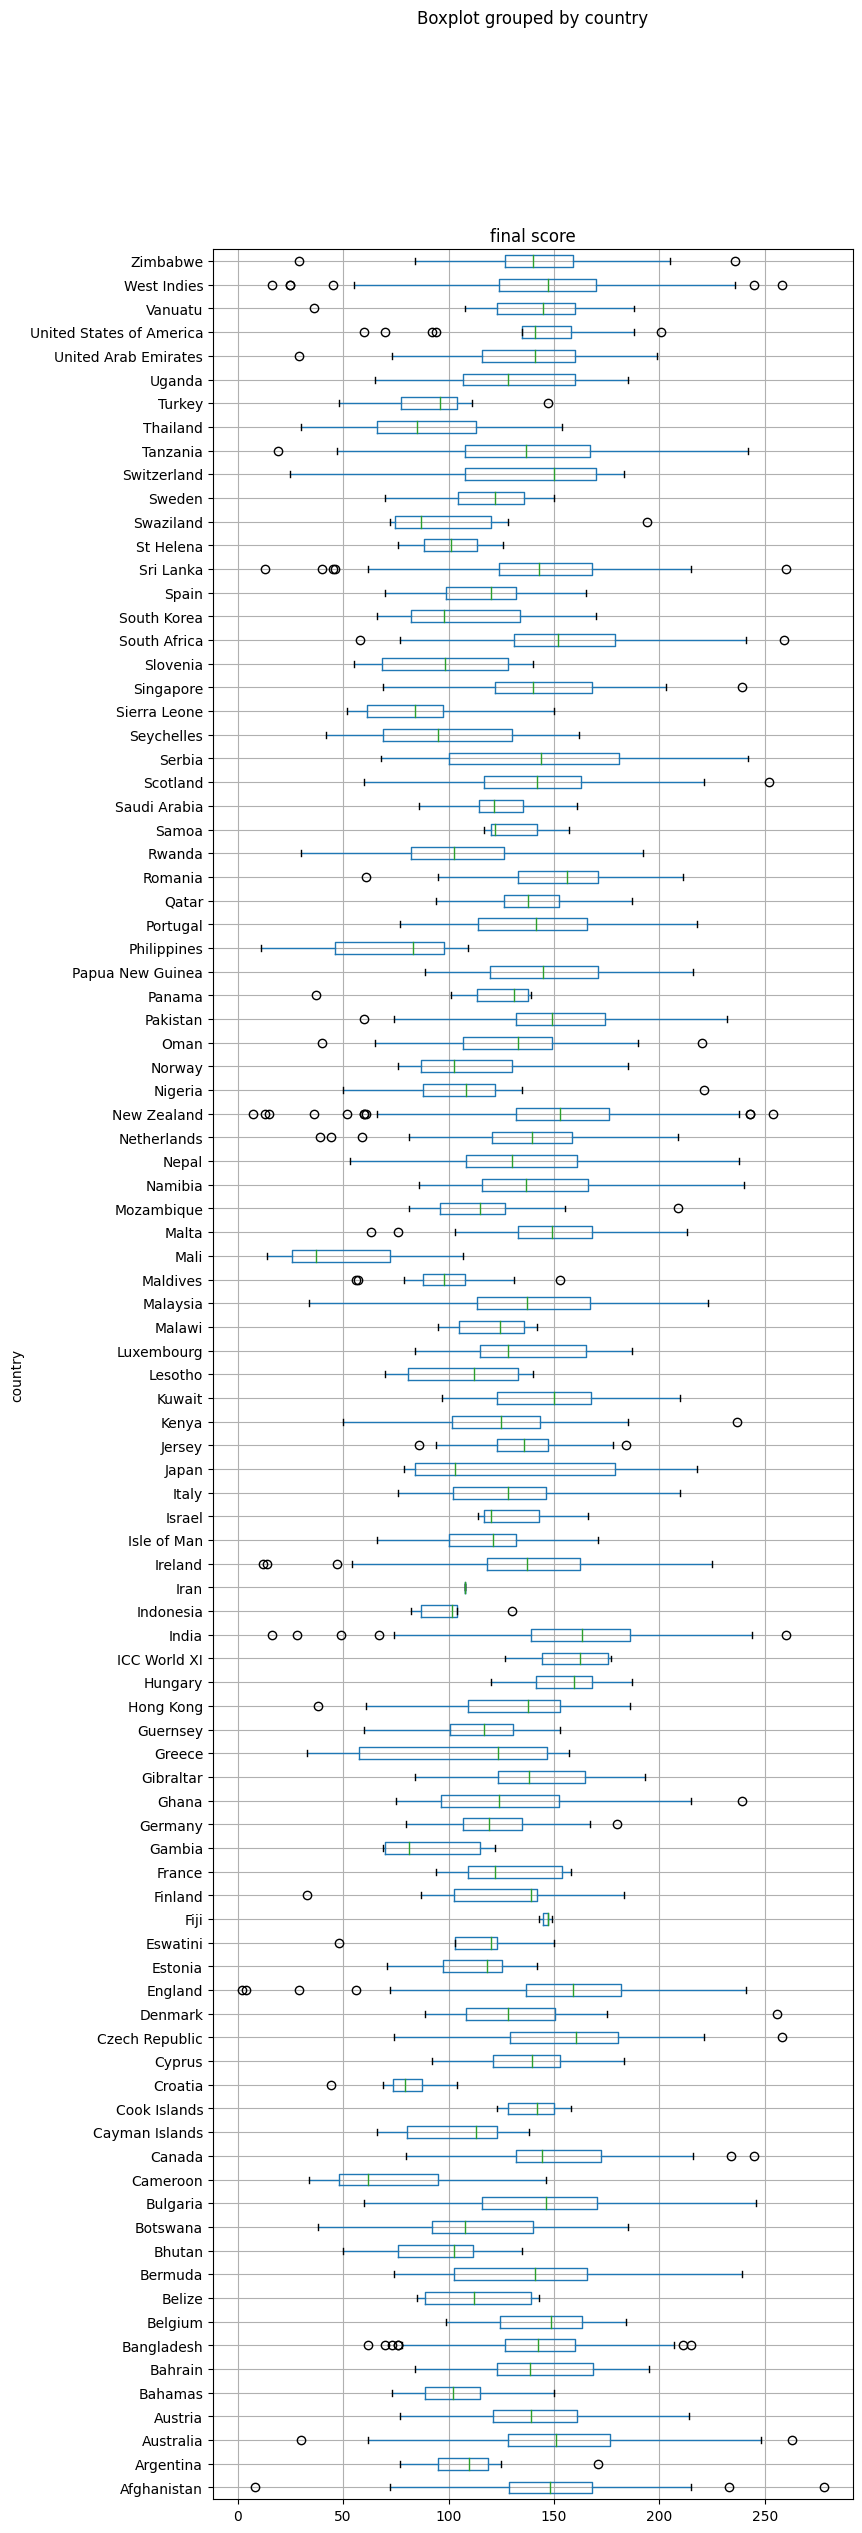

In [136]:
data = match_data[["match code", "country", "final score"]]
data = data.groupby(["match code","country","final score"]).first().reset_index()
data.drop(columns = ["match code"])
data.boxplot(column = "final score", by = "country", figsize = (8, 30), vert = False)

The above boxplot shows that the final score does depend a lot on the country, so we will use it as a feature.

## Total Wickets and Final Score

<Axes: title={'center': 'final score'}, xlabel='Total Wickets'>

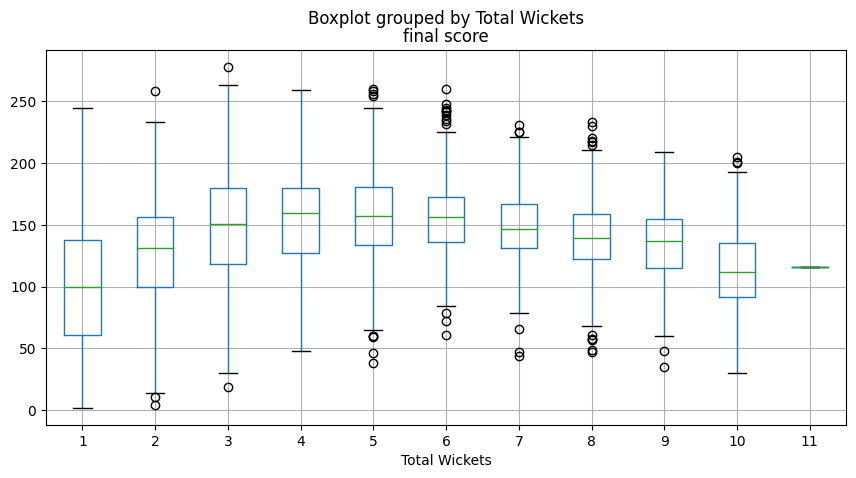

In [137]:
data_2 = match_data[["match code","country","Total Wickets","final score"]]
data_2 = data_2.groupby(["match code", "country", "final score"]).last().reset_index()
data_2.drop(columns = ["match code", "country"])
data_2.boxplot(column = "final score", by = "Total Wickets", figsize = (10, 5), vert = True)

This shows that the final score also does depend a bit on the total wickets

## Final Cleanup
Now the final score definitely depends on the current score and the current over and ball. One final thing I wanted to do was to combine the overs and ball columns before the final cleanup

In [138]:
match_data["total balls"] = match_data["over"] * 6 + match_data["ball"]
match_data = match_data[["country", "total balls", "score", "Total Wickets", "final score"]]

In [139]:
match_data.rename(columns = {"score":"current score", "Total Wickets": "total wickets"})

country  total balls  current score  total wickets  final score
0           Austria            0              0              0          121
1           Austria            1              4              0          121
2           Austria            2              4              0          121
3           Austria            3              4              0          121
4           Austria            4              5              0          121
...             ...          ...            ...            ...          ...
407784  New Zealand          115            165              8          170
407785  New Zealand          116            165              9          170
407786  New Zealand          117            169              9          170
407787  New Zealand          118            170              9          170
407788  New Zealand          119            170             10          170

[407789 rows x 5 columns]

## One-hot encoding for countries

In [140]:
country_names = match_data["country"].unique()
country_names = sorted(country_names)
print(country_names)
print(f"There are a total of {len(country_names)} countries")

['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Botswana', 'Bulgaria', 'Cameroon', 'Canada', 'Cayman Islands', 'Cook Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'England', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guernsey', 'Hong Kong', 'Hungary', 'ICC World XI', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jersey', 'Kenya', 'Kuwait', 'Lesotho', 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'St Helena', 'Swaziland', 'Sweden',

In [141]:
# Do one hot encoding
data_3 = pd.get_dummies(match_data["country"]).astype(int)
data_3.head()

Afghanistan  Argentina  Australia  Austria  Bahamas  Bahrain  Bangladesh  \
0            0          0          0        1        0        0           0   
1            0          0          0        1        0        0           0   
2            0          0          0        1        0        0           0   
3            0          0          0        1        0        0           0   
4            0          0          0        1        0        0           0   

   Belgium  Belize  Bermuda  ...  Switzerland  Tanzania  Thailand  Turkey  \
0        0       0        0  ...            0         0         0       0   
1        0       0        0  ...            0         0         0       0   
2        0       0        0  ...            0         0         0       0   
3        0       0        0  ...            0         0         0       0   
4        0       0        0  ...            0         0         0       0   

   Uganda  United Arab Emirates  United States of America  Vanuatu  \
0       0                     0                         0        0   
1       0                     0                         0        0   
2       0                     0                         0        0   
3       0                     0                         0        0   
4       0                     0                         0        0   

   West Indies  Zimbabwe  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  

[5 rows x 95 columns]

In [142]:
match_data_encoded = pd.concat([match_data,data_3], axis=1)
match_data_encoded.drop(columns = ["country"], inplace = True)
match_data_encoded

total balls  score  Total Wickets  final score  Afghanistan  \
0                 0      0              0          121            0   
1                 1      4              0          121            0   
2                 2      4              0          121            0   
3                 3      4              0          121            0   
4                 4      5              0          121            0   
...             ...    ...            ...          ...          ...   
407784          115    165              8          170            0   
407785          116    165              9          170            0   
407786          117    169              9          170            0   
407787          118    170              9          170            0   
407788          119    170             10          170            0   

        Argentina  Australia  Austria  Bahamas  Bahrain  ...  Switzerland  \
0               0          0        1        0        0  ...            0   
1               0          0        1        0        0  ...            0   
2               0          0        1        0        0  ...            0   
3               0          0        1        0        0  ...            0   
4               0          0        1        0        0  ...            0   
...           ...        ...      ...      ...      ...  ...          ...   
407784          0          0        0        0        0  ...            0   
407785          0          0        0        0        0  ...            0   
407786          0          0        0        0        0  ...            0   
407787          0          0        0        0        0  ...            0   
407788          0          0        0        0        0  ...            0   

        Tanzania  Thailand  Turkey  Uganda  United Arab Emirates  \
0              0         0       0       0                     0   
1              0         0       0       0                     0   
2              0         0       0       0                     0   
3              0         0       0       0                     0   
4              0         0       0       0                     0   
...          ...       ...     ...     ...                   ...   
407784         0         0       0       0                     0   
407785         0         0       0       0                     0   
407786         0         0       0       0                     0   
407787         0         0       0       0                     0   
407788         0         0       0       0                     0   

        United States of America  Vanuatu  West Indies  Zimbabwe  
0                              0        0            0         0  
1                              0        0            0         0  
2                              0        0            0         0  
3                              0        0            0         0  
4                              0        0            0         0  
...                          ...      ...          ...       ...  
407784                         0        0            0         0  
407785                         0        0            0         0  
407786                         0        0            0         0  
407787                         0        0            0         0  
407788                         0        0            0         0  

[407789 rows x 99 columns]

In [143]:
# Save the data
# match_data_encoded.to_csv(r"../Resources/final_score_data.csv", index = False)